# Week 10 Independent Lab
Author: Mark Lannen  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025

## Import Libraries

In [7]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

## Set working directory

In [8]:
os.getcwd()
os.chdir('/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week10labs/data')
os.getcwd()

'/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week10labs/data'

## Load Data

In [9]:
hosp_df = pd.read_table("calihospital.txt", sep = '\t')

hosp_df

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


## Determine Candidates for Predictor Variables
I have chosen 3, with at least one Categorical and one Numerical.
Teaching, NoFTE and AvlBeds.

In [10]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [11]:
numerical_df = (hosp_df
                .filter(['NoFTE','AvlBeds'])
          )

numerical_df.corr()

,NoFTE,AvlBeds
NoFTE,1.000000,0.881333
AvlBeds,0.881333,1.000000


## Create Decision Trees

### Use OperInc as Target Variable

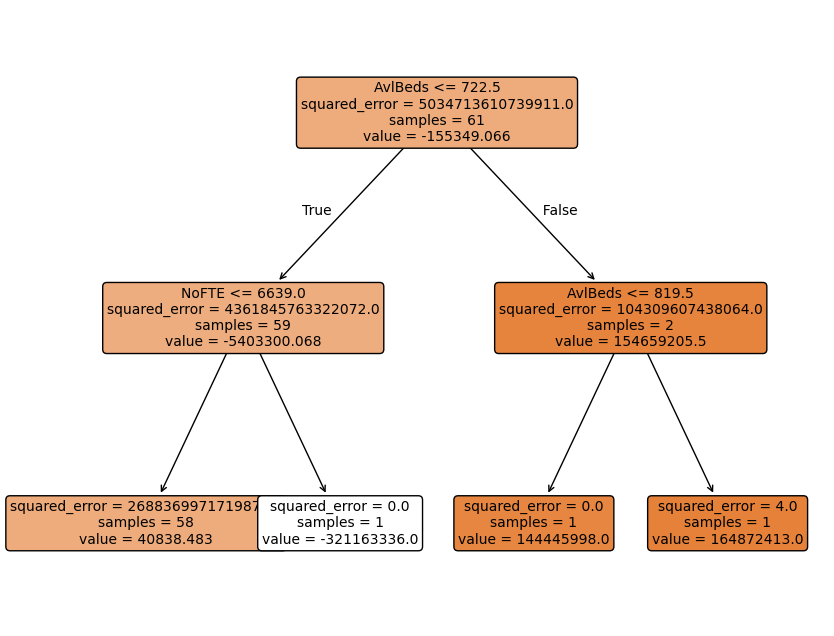

In [21]:
# Categorical Variable

categorical_var = (hosp_df
                .filter(['Teaching'])
          )

# categorical_df

# Convert categorical variable into numerical/dummy variable
dummy = pd.get_dummies(categorical_var, drop_first=True)
# dummy

# merge numerical and converted categorical variables
decision_tree_1 = pd.merge(numerical_df, dummy, left_index=True, right_index=True)
# decision_tree_

# Create regression tree
regression_tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(decision_tree_1, hosp_df['OperInc'])
# regression_tree_1

# Create plot labels
col_names_1 = list(decision_tree_1.columns.values)
# col_names_1

# Create plots
plt.figure(figsize=(10,8))
tree.plot_tree(regression_tree_1, feature_names=col_names_1, filled=True, rounded=True, fontsize=10)
plt.show()

### Use OperRev as Target Variable

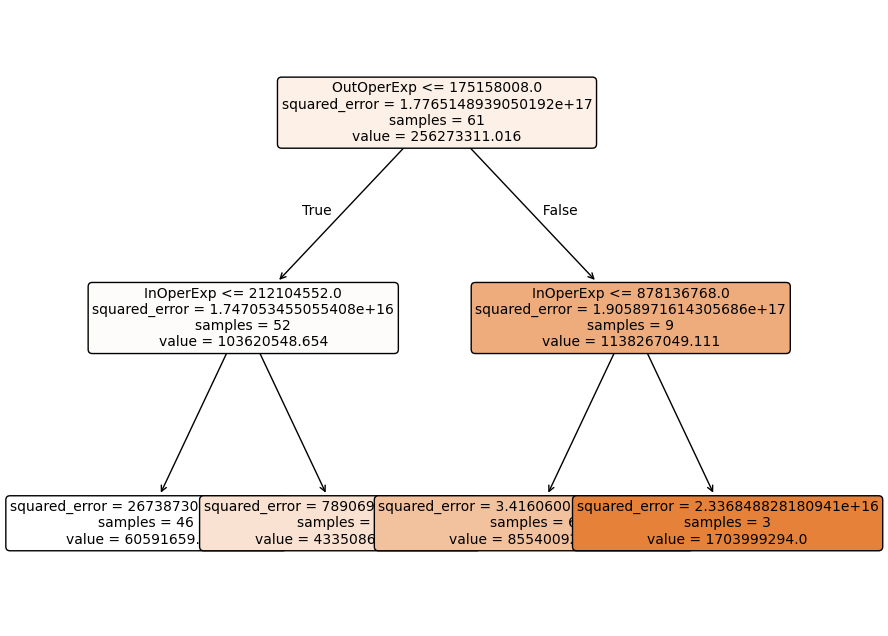

In [22]:
# create numerical list
hosp_sub_2 = (hosp_df
            .filter(['NetPatRev ', 'InOperExp', 'OutOperExp', 'OperInc'])
           )
# hosp_sub_2

# merge numerical and converted categorical variables
decision_tree_2 = pd.merge(hosp_sub_2, dummy, left_index=True, right_index=True)

# Create regression tree
regression_tree_2 = tree.DecisionTreeRegressor(max_depth=2).fit(decision_tree_2, hosp_df['OperRev'])
regression_tree_2

# Create plot labels
col_names_2 = list(decision_tree_2.columns.values)
col_names_2

# Create plots
plt.figure(figsize=(10,8))
tree.plot_tree(regression_tree_2, feature_names=col_names_2, filled=True, rounded=True, fontsize=10)
plt.show()

### Use TypeControl as a target variable

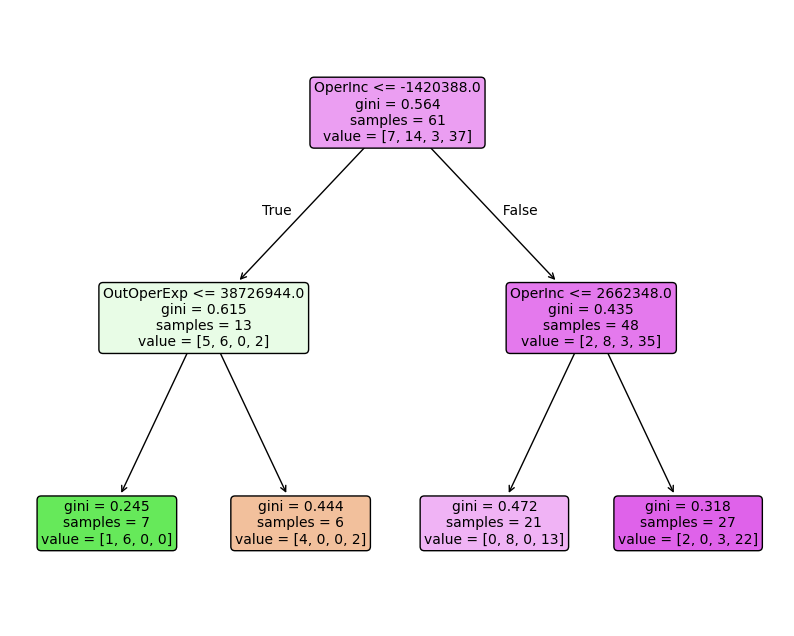

In [33]:
# create numerical list
hosp_sub_3 = (hosp_df
            .filter(['NoFTE', 'InOperExp', 'OutOperExp', 'OperInc', 'AvlBeds' ])
           )
# hosp_sub_3

# merge numerical and converted categorical variables
decision_tree_3 = pd.merge(hosp_sub_3, dummy, left_index=True, right_index=True)

# Create classification tree (FIXED: changed Regressor to Classifier)
regression_tree_3 = tree.DecisionTreeClassifier(max_depth=2).fit(decision_tree_3, hosp_df['TypeControl'])
regression_tree_3

# Create plot labels
col_names_3 = list(decision_tree_3.columns.values)
col_names_3

# Create plots
plt.figure(figsize=(10,8))
tree.plot_tree(regression_tree_3, feature_names=col_names_3, filled=True, rounded=True, fontsize=10)
plt.show()

### Use DonorType as a target variable

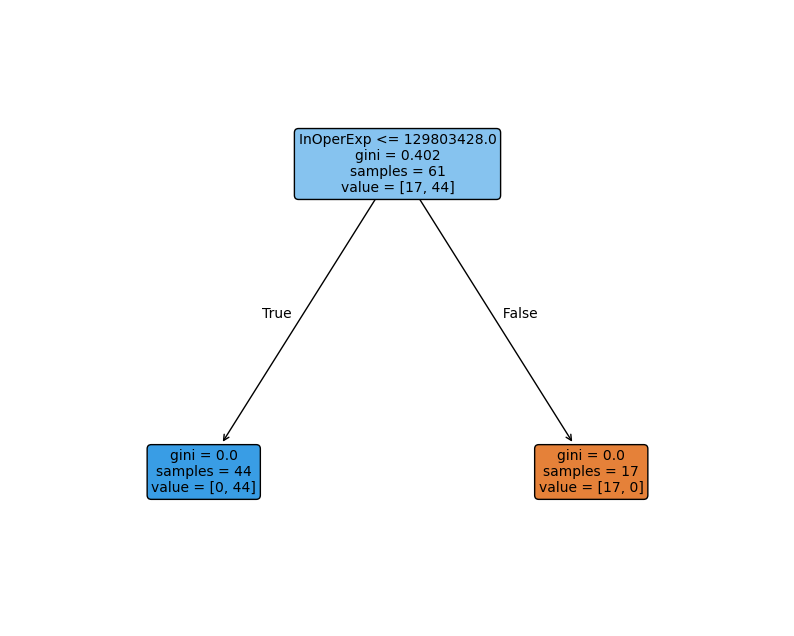

In [34]:
# create numerical list
hosp_sub_4 = (hosp_df
            .filter(['NoFTE', 'InOperExp', 'OutOperExp', 'OperInc'])
           )
# hosp_sub_4

# merge numerical and converted categorical variables
decision_tree_4 = pd.merge(hosp_sub_4, dummy, left_index=True, right_index=True)

# Create classification tree (FIXED: changed Regressor to Classifier)
regression_tree_4 = tree.DecisionTreeClassifier(max_depth=2).fit(decision_tree_4, hosp_df['DonorType'])
regression_tree_4

# Create plot labels
col_names_4 = list(decision_tree_4.columns.values)
col_names_4

# Create plots
plt.figure(figsize=(10,8))
tree.plot_tree(regression_tree_4, feature_names=col_names_4, filled=True, rounded=True, fontsize=10)
plt.show()

## Analysis
I'd recommend using the third tree (TypeControl) as this target variable defines who funds/runs the hospital. The trees that predict Operating Income and Operating Revenue use monetary amounts that come from similar sources. As such, it's not easy to tell which source of revenu is the more important factor.


## Sources
[ChatGPT](https://github.com/MarkLannen/week10labs/blob/main/assets/ChatGPT_Indpendent_Lab.pdf)  
[Instructor walkthrough](https://github.com/MarkLannen/week10labs/blob/main/10_Independent_Lab_Walkthrough.ipynb)